### Import Required Libraries

In [ ]:
# Import TensorFlow and Keras components needed for model building and training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Load and Preprocess Dataset

In [ ]:
dataset_path = "plant_data" # Define path to your dataset directory

# Rescale image pixel values and apply basic augmentation (if needed)
datagen = ImageDataGenerator(rescale=1./255)

# Load training and validation data from directory
# Images will be resized to 128x128, and labels will be one-hot encoded
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

### Define CNN Model Architecture

In [ ]:
# Build a Convolutional Neural Network for multi-class classification
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

### Compile, Save & Train the Model

Found 56971 images belonging to 39 classes.
Found 56971 images belonging to 39 classes.


C:\Users\vishe\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\vishe\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1408s 789ms/step - accuracy: 0.4196 - loss: 2.2000 - val_accuracy: 0.8412 - val_loss: 0.5395
Epoch 2/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 784s 440ms/step - accuracy: 0.7373 - loss: 0.8593 - val_accuracy: 0.8975 - val_loss: 0.3396
Epoch 3/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 796s 447ms/step - accuracy: 0.8075 - loss: 0.6064 - val_accuracy: 0.9396 - val_loss: 0.2046
Epoch 4/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 778s 436ms/step - accuracy: 0.8460 - loss: 0.4855 - val_accuracy: 0.9549 - val_loss: 0.1495
Epoch 5/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 784s 440ms/step - accuracy: 0.8708 - loss: 0.4070 - val_accuracy: 0.9522 - val_loss: 0.1409
Epoch 6/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1367s 767ms/step - accuracy: 0.8876 - loss: 0.3456 - val_accuracy: 0.9700 - val_loss: 0.0938
Epoch 7/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1192s 669ms/step - accuracy: 0.9054 - loss: 0.2896 - val_accuracy: 0.9734 - val_loss: 0.0868
Epoch 8/10
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 870s 488ms/step - accuracy: 

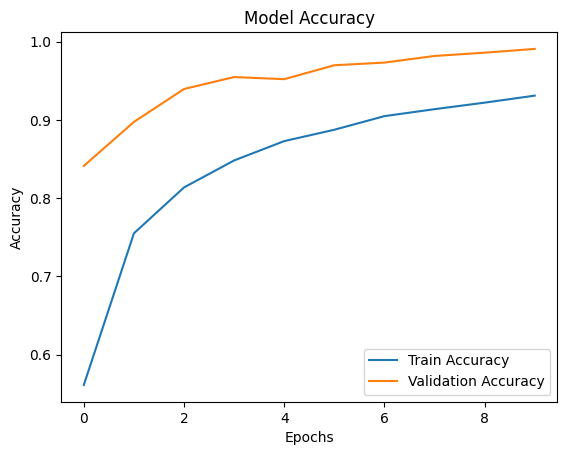

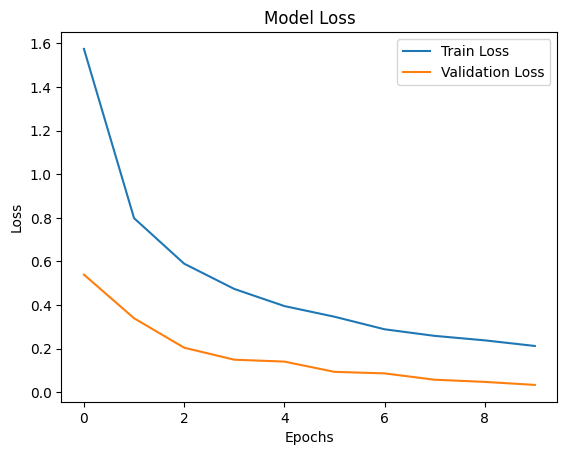

In [ ]:
# Compile the model using Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the model for 10 epochs using the training and validation generators
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)
# Save the trained model to .h5 file for future use
model.save("trained_model.h5")

import matplotlib.pyplot as plt
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()


### Model Testing

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

model = tf.keras.models.load_model("trained_model.h5")

img_path = "plant_data/Strawberry___Leaf_scorch/image (993).JPG"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

class_labels = list(train_generator.class_indices.keys())
print(f"Predicted Class: {class_labels[predicted_class]}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Predicted Class: Strawberry___Leaf_scorch


###(Optional) Convert to TensorFlow Lite

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('trained_model.h5')

model.export('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


Saved artifact at 'model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 13), dtype=tf.float32, name=None)
Captures:
  1651036109136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036107792: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036109520: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036108176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036110672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036103760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036108752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036106448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036107216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1651036104144: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
import tensorflow as tf

saved_model_dir = 'model'

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

# Save the converted model to file
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully converted to TensorFlow Lite!")

Model successfully converted to TensorFlow Lite!
